### Importing packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Reading the Development Data

In [32]:
DevelopmentData = pd.read_excel("DevelopmentData.xlsx", index_col=[0])
DevelopmentData.info()
DevelopmentData

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FirstObjectDistance_X   428 non-null    int64  
 1   FirstObjectDistance_Y   428 non-null    int64  
 2   SecondObjectDistance_X  428 non-null    int64  
 3   SecondObjectDistance_Y  428 non-null    int64  
 4   ThirdObjectDistance_X   428 non-null    int64  
 5   ThirdObjectDistance_Y   428 non-null    int64  
 6   FourthObjectDistance_X  428 non-null    int64  
 7   FourthObjectDistance_Y  428 non-null    int64  
 8   VehicleSpeed            428 non-null    int64  
 9   FirstObjectSpeed_X      428 non-null    int64  
 10  FirstObjectSpeed_Y      428 non-null    int64  
 11  SecondObjectSpeed_X     428 non-null    int64  
 12  SecondObjectSpeed_Y     428 non-null    int64  
 13  ThirdObjectSpeed_X      428 non-null    int64  
 14  ThirdObjectSpeed_Y      428 non-null    in

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,8211,1444,5455,-1153,3103,-1237,12024,1715,0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,8208,1443,5455,-1153,3102,-1237,0,0,0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,8211,1444,5453,-1160,3104,-1232,0,0,0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,8209,1445,5452,-1166,3104,-1232,0,0,0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,8209,1445,5452,-1167,3106,-1225,0,0,0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,782,-589,9912,-2071,0,0,1145,-733,0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,825,-619,9911,-2065,0,0,1144,-733,0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,820,-631,9906,-2060,0,0,1146,-730,0,674,-153,10,31,0,0,18,-5,-0.001343,72.972855
426,840,-644,9902,-2047,0,0,1145,-730,0,672,-129,11,35,0,0,19,-3,-0.001343,73.057103


### Data Preparation
#### Normalize Object Distances

In [33]:
distances = ["FirstObjectDistance_X", "FirstObjectDistance_Y","SecondObjectDistance_X", "SecondObjectDistance_Y","ThirdObjectDistance_X", "ThirdObjectDistance_Y","FourthObjectDistance_X", "FourthObjectDistance_Y"]
for  dist in distances:
    DevelopmentData[dist] /= 128
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0,674,-153,10,31,0,0,18,-5,-0.001343,72.972855
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0,672,-129,11,35,0,0,19,-3,-0.001343,73.057103


#### Normalize Vehicle Speed


In [34]:
DevelopmentData["VehicleSpeed"] /= 256
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,674,-153,10,31,0,0,18,-5,-0.001343,72.972855
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0.0,672,-129,11,35,0,0,19,-3,-0.001343,73.057103


#### Normalize Object Velocities

In [35]:
velocities = ["FirstObjectSpeed_X", "FirstObjectSpeed_Y","SecondObjectSpeed_X", "SecondObjectSpeed_Y","ThirdObjectSpeed_X", "ThirdObjectSpeed_Y","FourthObjectSpeed_X", "FourthObjectSpeed_Y"]

for vel in velocities:
    DevelopmentData[vel] /= 256

We reset the Timestamp column, so it starts from 0.0. This way, we can see that the file contains about 40 seconds worth of data.

In [36]:
DevelopmentData["Timestamp"] -= DevelopmentData.Timestamp.min()
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,0.000000
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,0.094456
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,0.188222
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,0.281266
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,0.377212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,39.562973
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,39.647940
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,39.731351
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0.0,2.625000,-0.503906,0.042969,0.136719,0.000000,0.000000,0.074219,-0.011719,-0.001343,39.815599


I calculated the difference between the timestamps, to calculate a **yaw** and a **displacement** relative to the previous position of the car and the objects. Because the first value contains *NaN* in the column, I imputed this column with the median, but using the first timestamp can be a good choice as well.

In [37]:
DevelopmentData["TimestampDiff"] = DevelopmentData.Timestamp.diff()
DevelopmentData.TimestampDiff.fillna(DevelopmentData.TimestampDiff.median(), inplace=True)
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp,TimestampDiff
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,0.000000,0.096680
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,0.094456,0.094456
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,0.188222,0.093766
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,0.281266,0.093044
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,0.377212,0.095946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,39.562973,0.082599
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,39.647940,0.084966
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,39.731351,0.083411
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0.0,2.625000,-0.503906,0.042969,0.136719,0.000000,0.000000,0.074219,-0.011719,-0.001343,39.815599,0.084248


### Data Exploration
First, I visualized how the Yaw rate changes in the whole scene. During the majority of the scene, the Yaw Rate is around 0.0, which means that the car does not make any significant turning motion, but after 32-33 seconds, the Yaw Rate will go to 0.4 radians/s, then it suddenly drops back to 0.0.

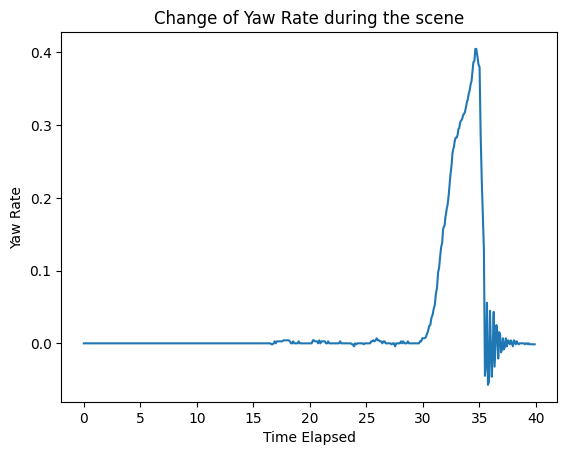

In [38]:
plt.plot(DevelopmentData.Timestamp, DevelopmentData.YawRate)
plt.xlabel("Time Elapsed")
plt.ylabel("Yaw Rate")
plt.title("Change of Yaw Rate during the scene")
plt.show()

I also visualized how the momentary speed of the car changes over time. First, the speed of the car remains 0 for around 15 seconds, then it slowly increases and stays around a maximum value of 4.3 $\frac{m}{s}$ for around 20 seconds, then it suddenly drops back to 0.

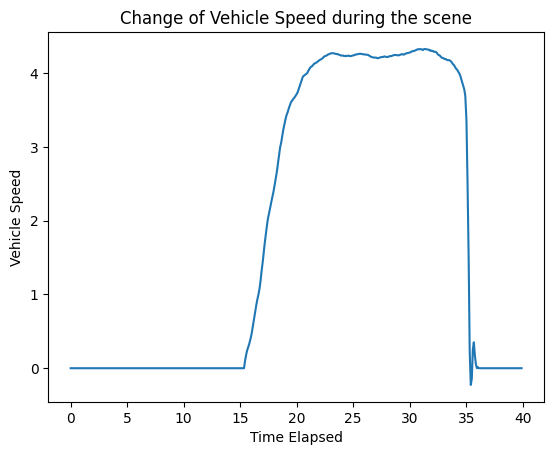

In [39]:
plt.plot(DevelopmentData.Timestamp, DevelopmentData.VehicleSpeed)
plt.xlabel("Time Elapsed")
plt.ylabel("Vehicle Speed")
plt.title("Change of Vehicle Speed during the scene")
plt.show()

### Trajectory calculation

In this section, I tried to estimate the possible route of the car and the 4 objects.
#### Car trajectory

I made the assumption that the car starts from a global origin, which will be the first position of the vehicle. Then I calculated every other position based on their previous position.
For that, I used the following equations:
    - $x_{k} = x_{k-1} + v_{k-1} \cdot \Delta t_{k} \cdot \cos{(\theta_{k-1}*\Delta t_{k})}$
    - $y_{k} = y_{k-1} + v_{k-1} \cdot \Delta t_{k} \cdot \sin{(\theta_{k-1}*\Delta t_{k})}$,
where $x$ and $y$ are the coordinates of the position, $v_{k-1}$ is the velocity of the car in the previous position, $\theta_{k-1}$ is the Yaw Rate in the previous observation, $\Delta t_{k}$ is the time that has passed since the previous moment. I used this instead of $\Delta t_{k-1}$ because the current time help us determine the Yaw and the distance the vehicle has taken during that time.

I visualized the result using a scatterplot. It looks like it takes a turn, but the scaling of the x- and y-axes are different. So this trajectory by itself is not enough to determine the correct scenario.

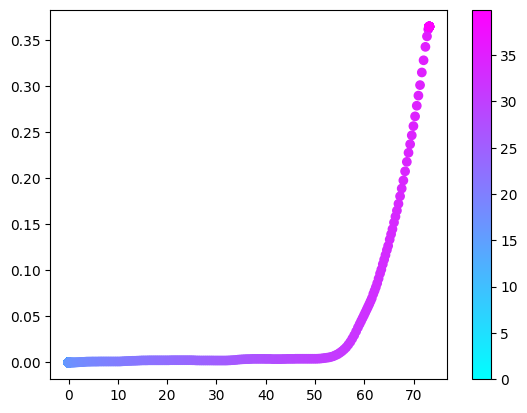

In [58]:
posx = [0.0]
posy = [0.0]
for i, row in DevelopmentData.iterrows():
    if i!=0:
        posx.append(posx[i-1] + DevelopmentData.loc[i-1,"VehicleSpeed"]*row.TimestampDiff*np.cos(DevelopmentData.loc[i-1, "YawRate"]*row.TimestampDiff))
        posy.append(posy[i-1] + DevelopmentData.loc[i-1, "VehicleSpeed"]*row.TimestampDiff*np.sin(DevelopmentData.loc[i-1, "YawRate"]*row.TimestampDiff))
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool")
plt.colorbar()
plt.show()

#### Object trajectory

In [41]:
def rotate_vector(dist):
    result = []
    for i, pos in enumerate(dist):
        RotM = np.array([[np.cos(DevelopmentData.iloc[i].YawRate*DevelopmentData.iloc[i].TimestampDiff), np.sin(DevelopmentData.iloc[i].YawRate*DevelopmentData.iloc[i].TimestampDiff)],
                [-1.0*np.sin(DevelopmentData.iloc[i].YawRate*DevelopmentData.iloc[i].TimestampDiff), np.cos(DevelopmentData.iloc[i].YawRate*DevelopmentData.iloc[i].TimestampDiff)]
                ])
        result.append(np.matmul(pos, RotM))
    return np.array(result)

In [42]:
o1 = rotate_vector(DevelopmentData.loc[:,["FirstObjectDistance_X","FirstObjectDistance_Y"]].values)

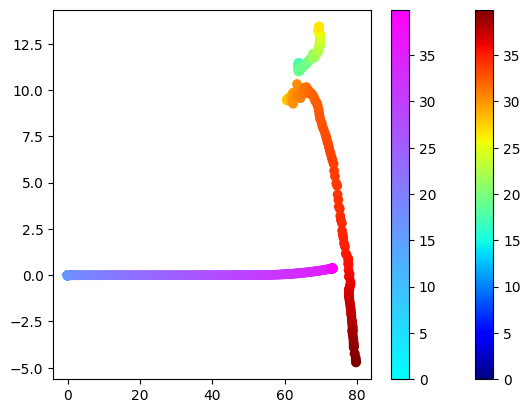

In [43]:
plt.scatter(posx+o1[:,0], posy+o1[:,1], c=DevelopmentData.Timestamp, cmap="jet")
plt.colorbar()
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool")
plt.colorbar()
plt.show()

In [44]:
o2 = rotate_vector(DevelopmentData.loc[:,["SecondObjectDistance_X","SecondObjectDistance_Y"]].values)

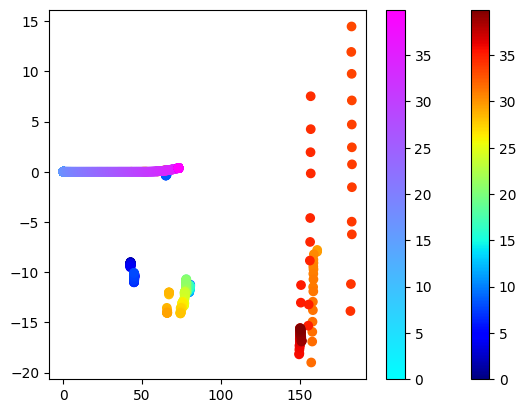

In [45]:
plt.scatter(posx+o2[:,0], posy+o2[:,1], c=DevelopmentData.Timestamp, cmap="jet")
plt.colorbar()
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool")
plt.colorbar()
plt.show()

In [46]:
o3 = rotate_vector(DevelopmentData.loc[:,["ThirdObjectDistance_X","ThirdObjectDistance_Y"]].values)

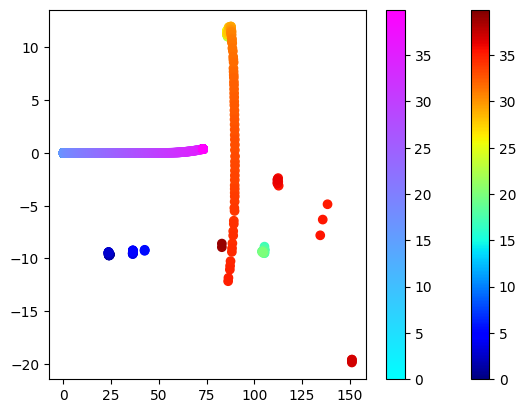

In [47]:
plt.scatter(posx+o3[:,0], posy+o3[:,1], c=DevelopmentData.Timestamp, cmap="jet")
plt.colorbar()
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool")
plt.colorbar()
plt.show()

In [48]:
o4 = rotate_vector(DevelopmentData.loc[:,["FourthObjectDistance_X","FourthObjectDistance_Y"]].values)

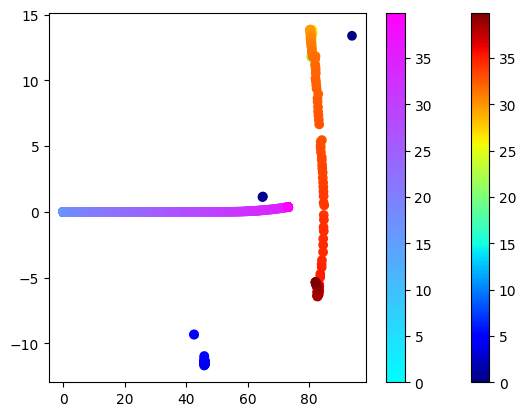

In [49]:
plt.scatter(posx+o4[:,0], posy+o4[:,1], c=DevelopmentData.Timestamp, cmap="jet")
plt.colorbar()
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool")
plt.colorbar()
plt.show()

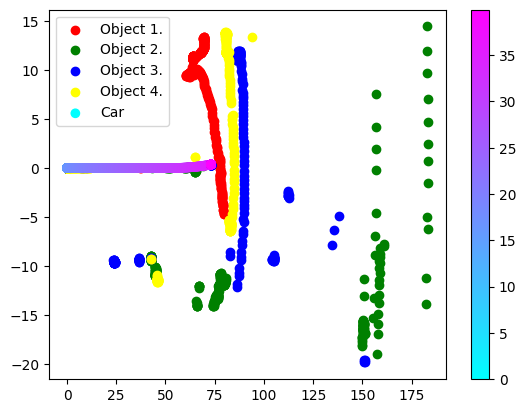

In [50]:
plt.scatter(posx+o1[:,0], posy+o1[:,1], label="Object 1.", color="red")
plt.scatter(posx+o2[:,0], posy+o2[:,1], label="Object 2.", color="green")
plt.scatter(posx+o3[:,0], posy+o3[:,1], label="Object 3.", color="blue")
plt.scatter(posx+o4[:,0], posy+o4[:,1], label="Object 4.", color="yellow")

plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool", label="Car")
plt.legend()
plt.colorbar()

In [51]:
# print(DevelopmentData["VehicleSpeed"] / DevelopmentData["TimestampDiff"])
# aMax = -9.
# maxJerk = -30.
# tlat = 1e-1
# aEgo = DevelopmentData.VehicleSpeed.values / DevelopmentData.TimestampDiff.values
# t2 = (aMax - aEgo) / maxJerk
# dv1 = 0.5*maxJerk * t2**2 + aEgo * t2
# v0 = DevelopmentData.VehicleSpeed.diff().fillna(0.0)
# #print(v0)
# v1 = v0 + dv1
# dv2 = -1.0*v1
# t3 = dv2 / aMax
# d1 = DevelopmentData.VehicleSpeed.values * tlat + 0.5 * aEgo * tlat ** 2
# d2 = (1/6)*maxJerk * t2**3 + 0.5*aEgo*t2**2 + DevelopmentData.VehicleSpeed.values * t2
# d3 = 0.5*aMax * t3**2 + v1*t3
# BrakeDist = d1+d2+d3
# # BrakeDist

In [56]:
BrakeDist = []
aMax = -9.
maxJerk = -30.
tlat = 1e-1
for i, row in DevelopmentData.iterrows():
    if i != 0:
        vEgo = DevelopmentData.loc[i-1, "VehicleSpeed"]
        aEgo = vEgo / DevelopmentData.loc[i, "TimestampDiff"]
        d1 = vEgo * tlat + 0.5*aEgo * tlat**2
        
        t2 = (aMax - aEgo) / maxJerk
        d2 = (maxJerk / 6) * t2**3 +  0.5 * aEgo * t2**2 + vEgo*t2
        
        dv1 = 0.5*maxJerk * t2**2 + aEgo * t2
        v0 = DevelopmentData.loc[i-1, "VehicleSpeed"]
        v1 = v0 + dv1
        
        dv2 = -1*v1
        t3 = dv2 / aMax
        d3 = 0.5*aMax * t3**2 + v1*t3
        BrakeDist.append(d1+d2+d3)
len(BrakeDist)

427

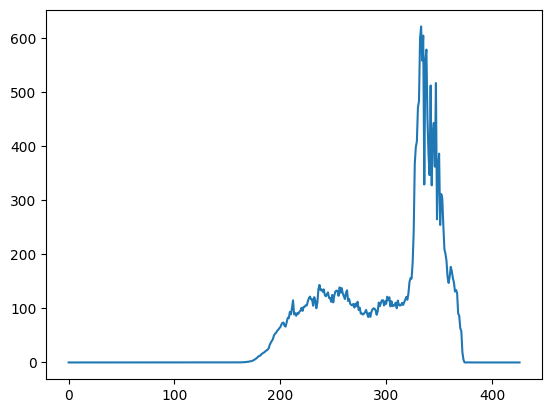

In [57]:
plt.plot(BrakeDist)
plt.show()

In [ ]:
DevelopmentData["FirstObjectResultantDistance"] = np.sqrt(DevelopmentData.FirstObjectDistance_X**2 + DevelopmentData.FirstObjectDistance_Y**2)
Distance = ctrl.Antecedent(DevelopmentData.FirstObjectResultantDistance, 'Distance')
VehicleSpeed = ctrl.Antecedent(DevelopmentData.VehicleSpeed, 'VehicleSpeed')
DevelopmentData["FirstObjectResultantVelocity"] = np.sqrt(DevelopmentData.FirstObjectSpeed_X**2 + DevelopmentData.FirstObjectSpeed_Y**2)
ObjectVelocity = ctrl.Antecedent(DevelopmentData.FirstObjectResultantVelocity, 'ObjectVelocity')
Choice = ctrl.Consequent(np.arange(0,6,1), 'Choice')

In [ ]:
Distance.automf(3)
VehicleSpeed.automf(3)
ObjectVelocity.automf(3)

In [ ]:
Choice['HardBrake'] = fuzz.trimf(Choice.universe, [0, 0, 13])

Choice['Honk'] = fuzz.trimf(Choice.universe, [0, 13, 25])
Choice['Warning'] = fuzz.trimf(Choice.universe, [13, 25, 25])
Choice['Nothing'] = fuzz.trimf(Choice.universe, [25, 38, 38])
plt.clf()
VehicleSpeed['average'].view()

In [ ]:
rule1 = ctrl.Rule(Distance['poor'] | VehicleSpeed['good'], Choice['HardBrake'])
rule2 = ctrl.Rule(Distance['poor'],Choice['Honk'])
rule3 = ctrl.Rule(Distance['good'] & VehicleSpeed['poor'], Choice['Nothing'])
rule4 = ctrl.Rule(Distance['average'] | VehicleSpeed['good'], Choice['Warning'])
rule5 = ctrl.Rule(Distance['poor'] & VehicleSpeed['poor'], Choice['Warning'])
rule6 = ctrl.Rule(Distance['average'] & VehicleSpeed['good'], Choice['Honk'])

#### Saving the modified data to a *csv* file.

In [ ]:
DevelopmentData.to_csv("DevelopmentData_modded.csv", index=False)